In [275]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.metrics import classification_report,confusion_matrix

In [276]:
df=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [277]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [278]:
df.shape

(5110, 12)

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [280]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [281]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:>

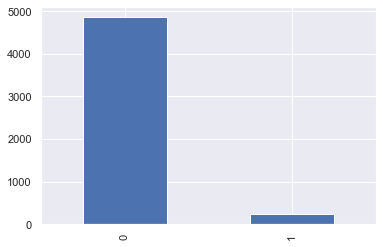

In [282]:
df.stroke.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='gender', ylabel='count'>

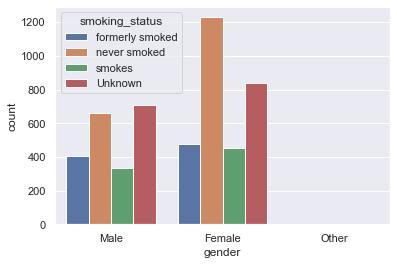

In [283]:
sns.countplot(x ='gender', hue = "smoking_status", data = df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

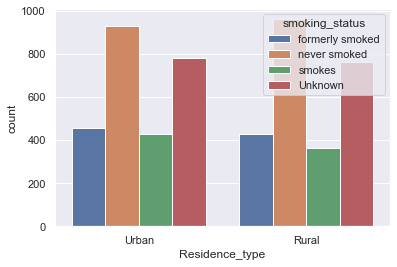

In [284]:
sns.countplot(x ='Residence_type', hue = "smoking_status", data = df)

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

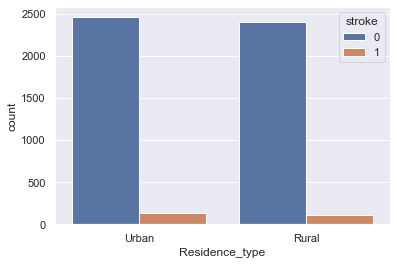

In [285]:
sns.countplot(x ='Residence_type', hue = "stroke", data = df)

In [286]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [287]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [288]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean())

In [289]:
#changing age datatypes float to int
df['age'] = df['age'].astype(int)

In [290]:
X=df.drop('stroke',axis=1)

In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 459.2+ KB


In [292]:
dfobj=X.drop(['id','age','hypertension','heart_disease','avg_glucose_level','bmi'],axis=1)

In [293]:
#ordinal encode input variables
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()
dfobj = ordinal.fit_transform(dfobj)

In [294]:
dfobj

array([[1., 1., 2., 1., 1.],
       [0., 1., 3., 0., 2.],
       [1., 1., 2., 0., 2.],
       ...,
       [0., 1., 3., 0., 2.],
       [1., 1., 2., 0., 1.],
       [0., 1., 0., 1., 0.]])

In [295]:
dfobj = pd.DataFrame(dfobj, columns =['gender','ever_married','work_type','Residence_type','smoking_status'])

In [296]:
dfobj.head()

,gender,ever_married,work_type,Residence_type,smoking_status
0,1.0,1.0,2.0,1.0,1.0
1,0.0,1.0,3.0,0.0,2.0
2,1.0,1.0,2.0,0.0,2.0
3,0.0,1.0,2.0,1.0,3.0
4,0.0,1.0,3.0,0.0,2.0


In [297]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [298]:
dfint=df.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)

In [299]:
dfint.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,9046,67,0,1,228.69,36.600000,1
1,51676,61,0,0,202.21,28.893237,1
2,31112,80,0,1,105.92,32.500000,1
3,60182,49,0,0,171.23,34.400000,1
4,1665,79,1,0,174.12,24.000000,1


In [300]:
df_col_merged = pd.concat([dfobj, dfint], axis=1)

In [301]:
df_col_merged.drop('id',axis=1,inplace=True)

<AxesSubplot:title={'center':'Heatmap for correlation'}>

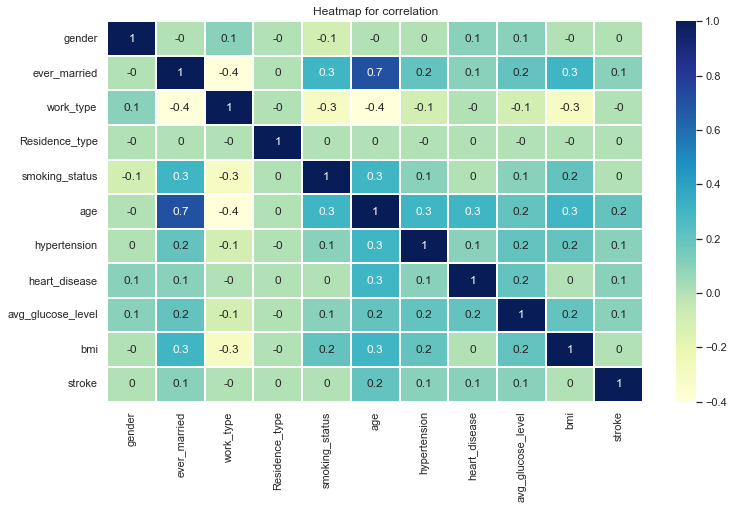

In [302]:
import matplotlib.pyplot as plt
import seaborn as sns
corr1=df_col_merged.corr()
fig,ax=plt.subplots(figsize=(12,7))
plt.title("Heatmap for correlation")
sns.heatmap(corr1.round(1),cmap='YlGnBu',annot=True,linewidth=0.30,ax=ax)

In [303]:
df_col_merged.shape

(5110, 11)

In [304]:
X1=df_col_merged.drop('stroke',axis=1)

In [305]:
y1=df_col_merged['stroke']

In [306]:
X_train,X_test,y_train,y_test=train_test_split(X1,y1,test_size=0.30,random_state=42)

In [307]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3577, 10)
(1533, 10)
(3577,)
(1533,)


In [308]:
lg=LogisticRegression()
lg.fit(X_train,y_train)

LogisticRegression()

In [309]:
print(lg.score(X_train,y_train))
print(lg.score(X_test,y_test))

0.9555493430248811
0.9419439008480104


In [310]:
y_pred_lg=lg.predict(X_test)

In [311]:
print(y_pred_lg)

[0 0 0 ... 0 0 0]


In [312]:
lgc=lgb.LGBMClassifier(n_estimators=35)
lgc.fit(X_train,y_train)

LGBMClassifier(n_estimators=35)

In [313]:
print(lgc.score(X_train,y_train))
print(lgc.score(X_test,y_test))

0.9658932065977076
0.9412915851272016


In [314]:
y_pred_lgb=lgc.predict(X_test)

In [315]:
cmlog=confusion_matrix(y_pred_lg,y_test)

In [316]:
print(cmlog)

[[1444   89]
 [   0    0]]


In [317]:
print(classification_report(y_pred_lg,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1533
           1       0.00      0.00      0.00         0

    accuracy                           0.94      1533
   macro avg       0.50      0.47      0.49      1533
weighted avg       1.00      0.94      0.97      1533



In [318]:
cmlgb=confusion_matrix(y_pred_lgb,y_test)

In [319]:
cmlgb

array([[1441,   87],
       [   3,    2]], dtype=int64)

In [320]:
print(classification_report(y_pred_lgb,y_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1528
           1       0.02      0.40      0.04         5

    accuracy                           0.94      1533
   macro avg       0.51      0.67      0.51      1533
weighted avg       0.99      0.94      0.97      1533

